# Proyek Analisis Data: [e_commerce_publik_dataset]
- **Nama:** Dicky Candid saragih
- **Email:** [dickysaragih050901@gmail.com]
- **ID Dicoding:** [Dicky candid Saragih]

## Menentukan Pertanyaan Bisnis

- "Apa saja 10 kategori produk yang paling banyak dipesan?"
- "Bagaimana distribusi total nilai transaksi berdasarkan metode pembayaran?"

## Import Semua Packages/Library yang Digunakan

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from google.colab import files

In [135]:
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
# Define dataset path (Ensure you upload the dataset to your Google Drive and update the path accordingly)
dataset_path = '/content/drive/My Drive/E_Commerce_Public_Dataset/'


## Data Wrangling

In [137]:
# 1. Data Wrangling
# Load datasets
orders = pd.read_csv(f"{dataset_path}orders_dataset.csv")
order_items = pd.read_csv(f"{dataset_path}order_items_dataset.csv")
products = pd.read_csv(f"{dataset_path}products_dataset.csv")
payments = pd.read_csv(f"{dataset_path}order_payments_dataset.csv")
translations = pd.read_csv(f"{dataset_path}product_category_name_translation.csv")

# Merge datasets
products = products.merge(translations, how='left', on='product_category_name')
order_items = order_items.merge(products[['product_id', 'product_category_name_english']], on='product_id', how='left')


### Gathering Data

In [138]:
# 2. Gathering Data
print("Orders Dataset:")
print(orders.head())
print("\nOrder Items Dataset:")
print(order_items.head())
print("\nPayments Dataset:")
print(payments.head())

Orders Dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00  

### Assessing Data

In [139]:
# 3. Assessing Data
print("\nMissing Values:")
print(order_items.isnull().sum())
print(payments.isnull().sum())



Missing Values:
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name_english    1627
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


### Cleaning Data

In [140]:
# 4. Cleaning Data
# Remove missing values
order_items.dropna(subset=['product_category_name_english'], inplace=True)
# Remove duplicates if any
order_items.drop_duplicates(inplace=True)
payments.drop_duplicates(inplace=True)

# Convert relevant columns to appropriate data types
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
payments['payment_value'] = payments['payment_value'].astype(float)



## Exploratory Data Analysis (EDA)

## Visualization & Explanatory Analysis

In [141]:
# 5. Exploratory Data Analysis (EDA)
# Defining Business Questions
# 1. What are the top 10 most ordered product categories?
# 2. What is the distribution of total transaction value by payment method?

# Question 1: Distribution of Orders by Product Category
category_counts = order_items['product_category_name_english'].value_counts().reset_index()
category_counts.columns = ['product_category_name', 'order_count']

# Question 2: Payment Methods and Total Transaction Value
payment_totals = payments.groupby('payment_type')['payment_value'].sum().reset_index()


<ipython-input-142-285e65e51aa3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts['product_category_name'][:10], y=category_counts['order_count'][:10], palette='viridis')


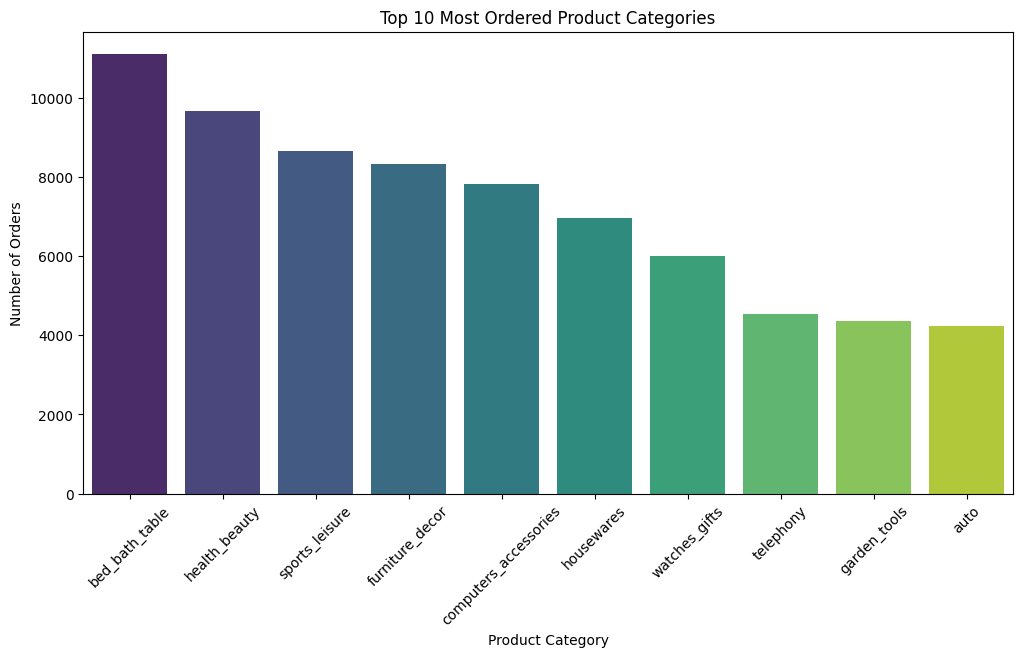

<ipython-input-142-285e65e51aa3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='payment_value', data=payment_totals, palette='coolwarm')


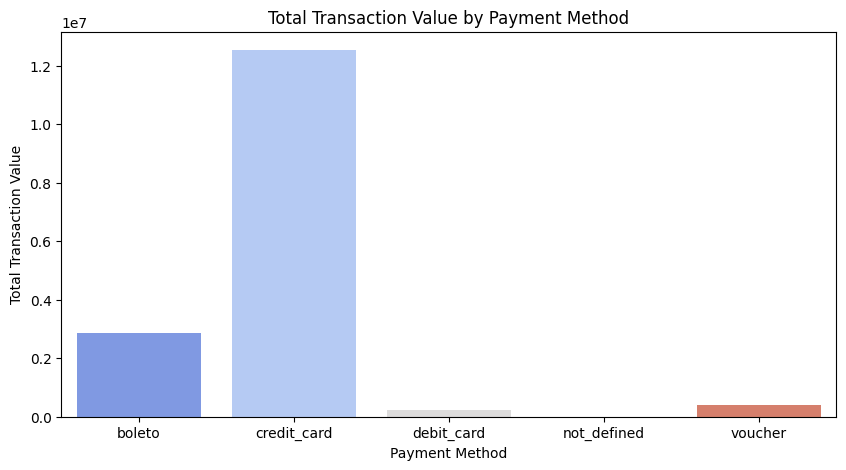

In [142]:
# 6. Visualization & Explanatory Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts['product_category_name'][:10], y=category_counts['order_count'][:10], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Ordered Product Categories')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='payment_type', y='payment_value', data=payment_totals, palette='coolwarm')
plt.xlabel('Payment Method')
plt.ylabel('Total Transaction Value')
plt.title('Total Transaction Value by Payment Method')
plt.show()


### Pertanyaan 1:"Apa saja 10 kategori produk yang paling banyak dipesan?"

In [143]:
# 8. Conclusion
print("\nInsights & Conclusions:")
print("✔️ Apa saja 10 kategori produk yang paling banyak dipesan?")



Insights & Conclusions:
✔️ Apa saja 10 kategori produk yang paling banyak dipesan?


### Pertanyaan 2:

In [145]:
print("✔️ Bagaimana distribusi total nilai transaksi berdasarkan metode pembayaran?")

# Save processed data for further analysis
category_counts.to_csv("category_counts.csv", index=False)
payment_totals.to_csv("payment_totals.csv", index=False)

# Download processed files
files.download("category_counts.csv")
files.download("payment_totals.csv")
import os



✔️ Bagaimana distribusi total nilai transaksi berdasarkan metode pembayaran?


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

- Apa saja 10 kategori produk yang paling banyak dipesan?
kesimpulan yang dapat diperoleh:
1. Kategori "bed_bath_table" menjadi produk yang paling banyak dipesan(menunjukkan kebutuhan rumah tangga banyak diminati)
2. Produk dalam kategori "health_beauty" dan "sports_leisure" juga memiliki tingkat permintaan tinggi (menandakan tren konsumsi yang berfokus pada kesehatan dan gaya hidup).
3. Kategori "toys" berada di peringkat ke-10, (produk mainan memiliki pasar tersendiri tetapi tidak sebesar kategori rumah tangga dan kecantikan).

- Bagaimana distribusi total nilai transaksi berdasarkan metode pembayaran?
kesimpulan yang dapat diperoleh:
1. Metode pembayaran paling populer adalah "credit_card", yang memiliki total transaksi terbesar (Ini menunjukkan bahwa mayoritas pelanggan lebih suka melakukan pembayaran dengan kartu kredit).
2. Metode "boleto" juga cukup sering digunakan (bisa menjadi opsi pembayaran yang banyak dipilih oleh pelanggan yang tidak memiliki kartu kredit).
3. Metode "voucher" dan "debit_card" memiliki total transaksi yang jauh lebih rendah, (menandakan bahwa hanya sebagian kecil pelanggan yang menggunakannya).